# Table of Contents
 <p><div class="lev1"><a href="#Attribute-Analysis-1">Attribute Analysis</a></div><div class="lev2"><a href="#Traditional-Measures-1.1">Traditional Measures</a></div><div class="lev3"><a href="#Centrality-1.1.1">Centrality</a></div><div class="lev3"><a href="#Assortativity-&amp;-Linear-Algebra-1.1.2">Assortativity &amp; Linear Algebra</a></div><div class="lev2"><a href="#Complex-Trace-Attributes-1.2">Complex Trace Attributes</a></div><div class="lev2"><a href="#Matrix-1.3">Matrix</a></div><div class="lev2"><a href="#Matrix-Decomposition-1.4">Matrix Decomposition</a></div><div class="lev2"><a href="#Music-Attributes-1.5">Music Attributes</a></div><div class="lev2"><a href="#Aggregation-Measures-1.6">Aggregation Measures</a></div>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import scipy as sc
import random
from scipy.signal import *
from numpy.linalg import *
from sklearn.decomposition import *
from sklearn.preprocessing import *
import librosa
import abel
#plotting parameters
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['CMU Serif']
rcParams['font.weight']=['heavy']

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.rc('axes', grid=False, titlesize='large', labelsize='large',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('figure', figsize = (12,6),titlesize='large',titleweight='black')
plt.rc('font', weight='heavy', size=11)
plt.rc('grid',linewidth=5)

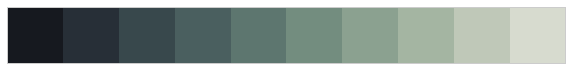

In [5]:
sns.palplot(sns.cubehelix_palette(10,hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [6]:
sns.set_palette(sns.cubehelix_palette(10, hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [7]:
data = pd.read_excel("../Data/data 03.2.xlsx")

In [8]:
years = sorted(set(data.year))
years = years[1:]
years

[1998, 1999, 2000, 2001, 2002]

In [9]:
months = ['Nov98', 'Dec98', 'jan_99', 'feb_99', 'mar_99', 'apr_99', 'may_99', 'jun_99', 'jul_99', 'aug_99', 'sep_99', 'oct_99',\
          'nov_99', 'dec_99', 'jan_2k', 'feb_2k', 'mar_2k', 'apr_2k', 'may_2k', 'jun_2k', 'jul_2k', 'aug_2k', 'sep_2k', 'oct_2k',\
          'nov_2k', 'dec_2k', 'jan_2k1', 'feb_2k1', 'mar_2k1', 'apr_2k1', 'may_2k1', 'jun_2k1', 'jul_2k1', 'aug_2k1', 'sep_2k1',\
          'oct_2k1', 'nov_2k1', 'dec_2k1', 'jan_2k2', 'feb_2k2', 'mar_2k2', 'apr_2k2', 'may_2k2', 'jun_2k2']

In [10]:
df_98 = data[data.year==years[0]]
df_99 = data[data.year==years[1]]
df_2k = data[data.year==years[2]]
df_2k1 = data[data.year==years[3]]
df_2k2 = data[data.year==years[4]]

In [11]:
def create_graph(df):
    tmp = df.values[:,1:3]
    G= nx.Graph()
    G = nx.from_edgelist(tmp)
    
    return G

In [12]:
Gt0 = create_graph(df_98)
Gt1 = create_graph(df_99)
Gt2 = create_graph(df_2k)
Gt3 = create_graph(df_2k1)
Gt4 = create_graph(df_2k2)

In [13]:
nov_98 = df_98[df_98.month==11]
dec_98= df_98[df_98.month==12]

G_nov98 = create_graph(nov_98)
G_dec98 = create_graph(dec_98)

In [14]:
jan_99=df_99[df_99.month==1]
feb_99=df_99[df_99.month==2]
mar_99=df_99[df_99.month==3]
apr_99=df_99[df_99.month==4]
may_99=df_99[df_99.month==5]
jun_99=df_99[df_99.month==6]
jul_99=df_99[df_99.month==7]
aug_99=df_99[df_99.month==8]
sep_99=df_99[df_99.month==9]
oct_99=df_99[df_99.month==10]
nov_99=df_99[df_99.month==11]
dec_99=df_99[df_99.month==12]


G_jan_99=create_graph(jan_99)
G_feb_99=create_graph(feb_99)
G_mar_99=create_graph(mar_99)
G_apr_99=create_graph(apr_99)
G_may_99=create_graph(may_99)
G_jun_99=create_graph(jun_99)
G_jul_99=create_graph(jul_99)
G_aug_99=create_graph(aug_99)
G_sep_99=create_graph(sep_99)
G_oct_99=create_graph(oct_99)
G_nov_99=create_graph(nov_99)
G_dec_99=create_graph(dec_99)

In [15]:
jan_2k=df_2k[df_2k.month==1]
feb_2k=df_2k[df_2k.month==2]
mar_2k=df_2k[df_2k.month==3]
apr_2k=df_2k[df_2k.month==4]
may_2k=df_2k[df_2k.month==5]
jun_2k=df_2k[df_2k.month==6]
jul_2k=df_2k[df_2k.month==7]
aug_2k=df_2k[df_2k.month==8]
sep_2k=df_2k[df_2k.month==9]
oct_2k=df_2k[df_2k.month==10]
nov_2k=df_2k[df_2k.month==11]
dec_2k=df_2k[df_2k.month==12]


G_jan_2k=create_graph(jan_2k)
G_feb_2k=create_graph(feb_2k)
G_mar_2k=create_graph(mar_2k)
G_apr_2k=create_graph(apr_2k)
G_may_2k=create_graph(may_2k)
G_jun_2k=create_graph(jun_2k)
G_jul_2k=create_graph(jul_2k)
G_aug_2k=create_graph(aug_2k)
G_sep_2k=create_graph(sep_2k)
G_oct_2k=create_graph(oct_2k)
G_nov_2k=create_graph(nov_2k)
G_dec_2k=create_graph(dec_2k)

In [16]:
jan_2k1=df_2k1[df_2k1.month==1]
feb_2k1=df_2k1[df_2k1.month==2]
mar_2k1=df_2k1[df_2k1.month==3]
apr_2k1=df_2k1[df_2k1.month==4]
may_2k1=df_2k1[df_2k1.month==5]
jun_2k1=df_2k1[df_2k1.month==6]
jul_2k1=df_2k1[df_2k1.month==7]
aug_2k1=df_2k1[df_2k1.month==8]
sep_2k1=df_2k1[df_2k1.month==9]
oct_2k1=df_2k1[df_2k1.month==10]
nov_2k1=df_2k1[df_2k1.month==11]
dec_2k1=df_2k1[df_2k1.month==12]


G_jan_2k1=create_graph(jan_2k1)
G_feb_2k1=create_graph(feb_2k1)
G_mar_2k1=create_graph(mar_2k1)
G_apr_2k1=create_graph(apr_2k1)
G_may_2k1=create_graph(may_2k1)
G_jun_2k1=create_graph(jun_2k1)
G_jul_2k1=create_graph(jul_2k1)
G_aug_2k1=create_graph(aug_2k1)
G_sep_2k1=create_graph(sep_2k1)
G_oct_2k1=create_graph(oct_2k1)
G_nov_2k1=create_graph(nov_2k1)
G_dec_2k1=create_graph(dec_2k1)

In [17]:
jan_2k2=df_2k2[df_2k2.month==1]
feb_2k2=df_2k2[df_2k2.month==2]
mar_2k2=df_2k2[df_2k2.month==3]
apr_2k2=df_2k2[df_2k2.month==4]
may_2k2=df_2k2[df_2k2.month==5]
jun_2k2=df_2k2[df_2k2.month==6]
jul_2k2=df_2k2[df_2k2.month==7]
aug_2k2=df_2k2[df_2k2.month==8]
sep_2k2=df_2k2[df_2k2.month==9]
oct_2k2=df_2k2[df_2k2.month==10]
nov_2k2=df_2k2[df_2k2.month==11]
dec_2k2=df_2k2[df_2k2.month==12]


G_jan_2k2=create_graph(jan_2k2)
G_feb_2k2=create_graph(feb_2k2)
G_mar_2k2=create_graph(mar_2k2)
G_apr_2k2=create_graph(apr_2k2)
G_may_2k2=create_graph(may_2k2)
G_jun_2k2=create_graph(jun_2k2)
G_jul_2k2=create_graph(jul_2k2)
G_aug_2k2=create_graph(aug_2k2)
G_sep_2k2=create_graph(sep_2k2)
G_oct_2k2=create_graph(oct_2k2)
G_nov_2k2=create_graph(nov_2k2)
G_dec_2k2=create_graph(dec_2k2)

In [18]:
all_year_G  =tuple([Gt0,Gt1,Gt2,Gt3,Gt4])

In [19]:
all_month_G = tuple([G_nov98,G_dec98,G_jan_99,G_feb_99,G_mar_99,G_apr_99,G_may_99,G_jun_99,G_jul_99,G_aug_99,G_sep_99,G_oct_99,\
              G_nov_99,G_dec_99,G_jan_2k,G_feb_2k,G_mar_2k,G_apr_2k,G_may_2k,G_jun_2k,G_jul_2k,G_aug_2k,G_sep_2k,\
              G_oct_2k,G_nov_2k,G_dec_2k,G_jan_2k1,G_feb_2k1,G_mar_2k1,G_apr_2k1,G_may_2k1,G_jun_2k1,G_jul_2k1,\
              G_aug_2k1,G_sep_2k1,G_oct_2k1,G_nov_2k1,G_dec_2k1,G_jan_2k2,G_feb_2k2,G_mar_2k2,G_apr_2k2,G_may_2k2,G_jun_2k2])

# Attribute Analysis

## Traditional Measures

### Centrality
- Degree
- Betweeness
- Closeness
- Katz
- Load

### Assortativity & Linear Algebra
- Density
- Average Clustering Coefficient
- Algebraic Connectivity

## Complex Trace Attributes

- Instantaneous Amplitude
- Instantaneous Frequency
- Instantaneous Phase
- Derivative of Amplitude
- Second Derivative of Amplitude
- Power
- Cosine of Instantaneous Phase
- Amplitude weighted Frequency
- Amplitude weighted Phase
- Power Spectral Density

## Matrix

- Resistance Distance
- Stationarity Ratio
- Subgraph Stationarity
- Curvature
- Norm of Abel Transform

## Matrix Decomposition
- KLPCA Ratio Change
- Norm NMF Ratio Change

## Music Attributes
- Zero Crossing Rate
- Spectral Centroid

## Aggregation Measures
- Persistence
- Emergence
- NRMS of Attributes



In [20]:
def calc_seisatt(net):
    M = nx.normalized_laplacian_matrix(net).todense()
    Ht = hilbert(M)  
    rHt = np.real(Ht)
    iHt = np.imag(Ht)
    
    #Basic attributes IA, IP, IF
    IA = np.real(np.nan_to_num(np.sqrt(np.dot(rHt,rHt)+np.dot(iHt,iHt))))
    IP = np.real(np.nan_to_num(np.arctan(iHt/rHt)))
    IF,_ = np.real(np.nan_to_num(np.asarray(np.gradient(IP))))
    P = np.square(IA)
    
    #Derivatives 
    dIA,_ = np.nan_to_num(np.asarray(np.gradient(IA)))
    d2IA,_ = np.nan_to_num(np.asarray(np.gradient(dIA)))
    IAcc,_ =np.nan_to_num(np.asarray(np.gradient(IF)))
   
    #Derived Attributes
    cosIP = np.cos(IP)
    IA_weit_IF = IA * IF
    IA_weit_IP = IA*IP

    return [IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP]

In [21]:
def stationarity_ratio(G):
    #stationarity ratio with laplian
    L = nx.normalized_laplacian_matrix(G).todense()
    U = eigvals(L)
    C =np.cov(L)
    CF = np.dot(L,np.dot(np.dot(U.T,C),U))
    r = np.linalg.norm(np.diag(CF))/np.linalg.norm(CF)
       
    return r

In [22]:
#cite:`klein1993resistance`
def resistance_distance(net):  
    M = nx.normalized_laplacian_matrix(net).todense()
    pseudo = pinv(M)
    N = M.shape[0]
    d = np.diag(pseudo)
    rd  = np.kron(d,np.ones((N,1))).T+np.kron(d,np.ones((N,1))).T - pseudo - pseudo.T
    
    return rd.mean()

In [23]:
def curvature(net):
    from skimage.feature import hessian_matrix, hessian_matrix_det, hessian_matrix_eigvals
    M = nx.normalized_laplacian_matrix(net).todense()
    M = np.float64(M)
    fx, fy = np.gradient(M)
    Hxx, Hxy, Hyy = hessian_matrix(M)
    K = np.divide((np.dot(Hxx,Hxy)-np.dot(Hxy,Hxy)),\
                  (1+np.dot(fx,fx)+np.dot(fy,fy)))   
    He1,_ = hessian_matrix_eigvals(Hxx,Hxy,Hyy)
    mean_curv = np.trace(He1)
   
    return mean_curv

In [24]:
def kpca_ratio(net):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components=3,kernel='rbf')
    m = nx.normalized_laplacian_matrix(net).todense()
    X_kpca = kpca.fit_transform(m)
    pc1 = X_kpca[:,0]
    pc2 = X_kpca[:,1]
    pc3 = X_kpca[:,2]
    kpca_rat = norm(pc1-pc3/(pc1-pc2)) 
    return kpca_rat

In [25]:
def kpca_att(net):
    kpca_chg = []
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        kpcar1= kpca_ratio(net[x])
        kpcar2= kpca_ratio(net[y])
        kpca_chg.append(np.divide(kpcar2,kpcar1))
    kpca_chgpad = np.zeros(len(kpca_chg)+1);
    kpca_chgpad[1:] = kpca_chg   
    
    return kpca_chgpad

In [26]:
def nmf_att(net):
    nmf_chg = []
    
    nmf = NMF(init='nndsvda',solver='cd', random_state=0, l1_ratio=1)
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        m1= abs(nx.normalized_laplacian_matrix(net[x]).todense())
        m2= abs(nx.normalized_laplacian_matrix(net[y]).todense())
        nmf1 = norm(nmf.fit_transform(m1))
        nmf2 = norm(nmf.fit_transform(m2))
        nmf_chg.append(np.divide(nmf2,nmf1))
    nmf_chgpad = np.zeros(len(nmf_chg)+1);
    nmf_chgpad[1:] = nmf_chg   
    
    return nmf_chgpad

In [27]:
def pad_shape(x,ref,offset=0):
    result = np.zeros_like(ref)
    result[0:x.shape[0]+0,0:x.shape[1]+0] = x
    
    return result

def subgraph_stat(net1,net2):
    net1_int_net2 = net1.copy()
    net1_int_net2.remove_nodes_from(n for n in net1 if n not in net2)
    net1_u_net2 = nx.disjoint_union(net1, net2)
    int_adjmat = nx.normalized_laplacian_matrix(net1_int_net2).todense()
    uni_adjmat = nx.normalized_laplacian_matrix(net1_u_net2).todense()
    int_adjmat_pad = pad_shape(int_adjmat,uni_adjmat)
    
    Ct = np.divide(norm(int_adjmat_pad),norm(uni_adjmat))
    
    return Ct

def zeta(n):
       
    Ct_m = []
    for i in range(len(n)-1):
        x = int(i)
        y = x +1
        Ct_m.append(subgraph_stat(n[x],n[y]))
    Ct_m_pad = np.zeros(len(Ct_m)+1);
    Ct_m_pad[1:] = Ct_m
    return Ct_m_pad

In [28]:
def music_att(n):
    #music attributes
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(n).todense()).mean(axis=1)
    zcr = librosa.feature.zero_crossing_rate(f)[0,0]
    spc = librosa.feature.spectral_centroid(f)[0,0]
    
    return [zcr,spc]

In [29]:
def norm_fabel(x):
    import abel
    fabel_att =[]
    for n in x:
        tmp = nx.normalized_laplacian_matrix(n).todense()
        tmp2 = sc.fftpack.fft2(tmp)
        fabel2 = abel.Transform(tmp2, direction='forward', method='direct').transform
        mag = np.sqrt(np.square(np.real(fabel2)) + np.square(np.imag(fabel2)))
        fabel_att.append(norm(mag))
        
    return np.log10(fabel_att)

In [30]:
def cal_avg_atts(x):
    
    #define attributes placeholders here
    deg_y = []
    bet_y = []
    clo_y = []
    load_y = []
    eig_y = []
    katz_y = []
    den_y = []
    algc_y = []
    cluscof_y = []
    IA_y = []
    IP_y = [] 
    IF_y = []
    P_y = []
    dIA_y = []
    d2IA_y =[] 
    IAcc_y = []
    cosIP_y = []
    IA_weit_IF_y = []
    IA_weit_IP_y = []
    psd_y = []    
    rd_y = []    
    zcr_y = []
    spc_y = []
    statr_y = []   
    meank_y = []
    
    #matrix decompostion attributes
    zeta_y = zeta(x)
    nmf_ratio_y = nmf_att(x)
    kpca_chg_y= kpca_att(x)
    prop_members_chg_1_zeta = 1-zeta_y
    fabel = norm_fabel(x)
    
    for n in x:
        deg = np.mean(sorted(set(nx.degree_centrality(n).values())))
        bet = np.mean(sorted(set(nx.betweenness_centrality(n).values())))
        clo = np.mean(sorted(set(nx.closeness_centrality(n).values())))
        katz = np.mean(sorted(set(nx.katz_centrality_numpy(n).values())))
        eig = np.mean(sorted(set(nx.eigenvector_centrality_numpy(n).values())))
        load = np.mean(sorted(set(nx.degree_centrality(n).values())))
        den = nx.density(n)
        algc = nx.algebraic_connectivity(n)
        clustcof = nx.average_clustering(n)

        #all network metrics
        deg_y.append(deg), bet_y.append(bet), clo_y.append(clo), load_y.append(load), katz_y.append(katz), \
        den_y.append(den),  algc_y.append(algc), cluscof_y.append(clustcof), eig_y.append(eig)

        #complex trace attributes
        IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP = calc_seisatt(n)
        IA_y.append(IA.mean())
        IP_y.append(IP.mean())
        IF_y.append(IF.mean())
        P_y.append(P.mean())
        dIA_y.append(dIA.mean())
        d2IA_y.append(d2IA.mean()) 
        IAcc_y.append(IAcc.mean())
        cosIP_y.append(cosIP.mean())
        IA_weit_IF_y.append(IA_weit_IF.mean())
        IA_weit_IP_y.append(IA_weit_IP.mean())

        psd, _ = plt.psd(nx.laplacian_matrix(n).todense());
        plt.close()
        psd_y.append(psd.mean())

        zcr, spc = music_att(n)
        zcr_y.append(zcr)
        spc_y.append(np.log10(spc))

        #matrix attributes
        rdm = resistance_distance(n)
        rd_y.append(rdm)

        statrat = stationarity_ratio(n)
        statr_y.append(statrat)

        meank = curvature(n)
        meank_y.append(meank)
        


    colnames = ['AvgDeg','AvgBet','AvgClo','AvgLoad','AvgKatz','AvgDensity','AvgAlgCon','AvgClustCoff',''\
               'AvgEig' ,'InstAmp','InstPhase','InstFreq','Power','dInstAmp','d2InstAmp','InstAcc','cosInstPhase',\
               'A_wt_IF','A_wt_IP','PowerSpecDen','ResDist','ZeroCrossRate','LogSpecCentroid','StatRat','MeanCurv']

    attvol_y = pd.DataFrame([deg_y,bet_y, clo_y ,load_y ,katz_y ,den_y, algc_y ,cluscof_y,eig_y ,IA_y ,IP_y , IF_y,\
                 P_y ,dIA_y ,d2IA_y,IAcc_y ,cosIP_y ,IA_weit_IF_y ,IA_weit_IP_y ,psd_y ,rd_y, zcr_y ,spc_y,\
                 statr_y , meank_y]).T

    attvol_y.columns = colnames
    attvol_y['SubgraphStat']=zeta_y
    attvol_y['1-Zeta'] = prop_members_chg_1_zeta
    attvol_y['LogKPCARatioChg'] = np.log10(kpca_chg_y)
    attvol_y.LogKPCARatioChg[0]=0
    attvol_y['NormNMFRatioChg']= nmf_ratio_y
    attvol_y['NormFAbel'] = fabel
    attvol_y_sc = attvol_y.apply(lambda x: minmax_scale(x, feature_range=[-1,1]))

    return attvol_y_sc


In [31]:
attvol_m = cal_avg_atts(all_month_G)

C:\Users\arsha_000\Anaconda3\lib\site-packages\abel\transform.py:341: ComplexWarning: Casting complex values to real discards the imaginary part
  self.IM = self.IM.astype('float64')


Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to a pure Python backend...
Falling back to 

In [32]:
persistence_m = attvol_m.mean(axis=1)/(attvol_m.shape[0]-1)

In [33]:
def RMS(x, axis=None):
    rms = np.sqrt(np.mean(np.square(x), axis=axis))
    return rms

def emergence(per):
    tmp = np.asarray(per)
    emerg = []
    for i in range(len(tmp)-1):
        x= int(i)
        y = x +1
        #print(tmp[y], tmp[x])
        if tmp[y]==tmp[x]:
            emerg.append(0)
        elif tmp[y] < (0) or tmp[x] < 0:
            res = (tmp[y]-tmp[x])/(abs(tmp[y])+abs(tmp[x]))
            emerg.append(res)
        else:
            res = (tmp[y]-tmp[x])/max([tmp[y],tmp[x]])
            emerg.append(res)
    tmp2 = np.zeros(len(emerg)+1)
    tmp2[1:] = emerg
    
    return tmp2
            

def NRMS(n):
    nrms = []
    for i in range(len(n)-1):
        x= int(i)
        y = x +1
        a = n[x]
        b = n[y]
        nrms_ = np.divide((RMS(a-b)),(RMS(a)+RMS(b)))
        nrms.append(nrms_)
    tmp2 = np.zeros(len(nrms)+1)
    tmp2[1:] = nrms
    
    return tmp2

In [34]:
rms_m = attvol_m.apply(lambda x: RMS(x), axis=1)
nrms_m = NRMS(rms_m)
emerg_m = emergence(persistence_m)
final_attvol_m = attvol_m.copy()

final_attvol_m['NRMS'] = nrms_m
final_attvol_m['RMS']=rms_m
final_attvol_m['Emergence'] =emerg_m

path = '/home/arshad/Documents/MScDataScience/Thesis/Code/attribute_data/lap_att.xlsx'
final_attvol_m.to_excel(path)

In [39]:
fat = final_attvol_m.T
fat.columns = months

In [42]:
fat = fat.T

In [48]:
fat.head()

,AvgDeg,AvgBet,AvgClo,AvgLoad,AvgKatz,AvgDensity,AvgAlgCon,AvgClustCoff,AvgEig,InstAmp,...,StatRat,MeanCurv,SubgraphStat,1-Zeta,LogKPCARatioChg,NormNMFRatioChg,NormFAbel,NRMS,RMS,Emergence
Nov98,0.475524,1.000000,0.810523,0.475524,0.267132,-0.318532,1.0,-1.000000,0.183689,0.679834,...,0.407864,-0.242635,-1.000000,1.000000,-0.015769,-1.000000,-0.462862,0.000000,0.720535,0.000000
Dec98,-0.027972,0.250903,0.509903,-0.027972,0.096842,-0.419219,1.0,-0.000165,-0.146384,0.305093,...,0.570795,-0.269438,0.766117,-0.766117,-0.038205,-0.535669,-0.278581,0.134533,0.549652,-0.212388
jan_99,0.388112,1.000000,0.785809,0.388112,0.281247,-0.622808,1.0,-1.000000,-0.077805,0.450396,...,0.836955,-0.337965,0.873376,-0.873376,0.023097,-0.718620,-0.221163,0.044101,0.600369,0.417980
feb_99,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,0.875504,1.000000,...,-1.000000,1.000000,0.421859,-0.421859,-0.091706,-0.846725,-1.000000,0.190102,0.882210,1.000000
mar_99,0.559441,1.000000,0.835787,0.559441,0.423150,-0.054825,1.0,-1.000000,0.198663,0.860240,...,0.074177,0.108395,0.763599,-0.763599,0.106766,-0.585848,-0.650293,0.128395,0.681444,-0.969469


In [47]:
fat.to_excel('attribute_data/att_data.xlsx')